In [1]:
# Tells matplotlib to display images inline instead of a new window
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


from sklearn.preprocessing import scale
#from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error


# We'll use the statsmodels library OLS tools 

In [2]:
df = pd.read_excel('HW2_data.xlsx')
df.head() # and take a look at the header of the data frame.

#I found mean of outliers in 12 month seasonality
Mean88 = df.loc[df['Index'] % 7 == 4, 'Daily Total'].mean()
Mean32 = df.loc[df['Index'] % 7 == 4, 'Daily Total'].mean()
Mean33 = df.loc[df['Index'] % 7 == 5, 'Daily Total'].mean()
Mean34 = df.loc[df['Index'] % 7 == 6, 'Daily Total'].mean()

#Enter means for outlier entries
df.at[87, 'Daily Total'] = Mean88
df.at[31, 'Daily Total'] = Mean32
df.at[32, 'Daily Total'] = Mean33
df.at[33, 'Daily Total'] = Mean34



In [3]:
####  Obtaining other predictors ####
df.drop('Date', inplace=True, axis=1)

df_train = df[0:275]
df_test = df[275:367]


df_train['sqrtd'] = np.sqrt(df_train['Index'])

daily_total_7 = np.pad(df_train['Daily Total'],(7,0),mode='constant')
df_train = df_train.reindex(list(range(0, 303))).reset_index(drop=True)


df_train['daily_total_7'] = pd.Series(daily_total_7)



daily_total_28 = np.pad(df_train['Daily Total'],(28,0),mode='constant')

df_train['daily_total_28'] = pd.Series(daily_total_28)

df_train.rename(columns = {'Daily Total':'daily_total'}, inplace = True)
df_train.rename(columns = {'Index':'index'}, inplace = True)

###############################################3

df_test['sqrtd'] = np.sqrt(df_test['Index'])

daily_total_7 = np.pad(df_test['Daily Total'],(7,0),mode='constant')
df_test = df_test.reindex(list(range(275, 394))).reset_index(drop=True)


df_test['daily_total_7'] = pd.Series(daily_total_7)



daily_total_28 = np.pad(df_test['Daily Total'],(28,0),mode='constant')

df_test['daily_total_28'] = pd.Series(daily_total_28)

df_test.rename(columns = {'Daily Total':'daily_total'}, inplace = True)
df_test.rename(columns = {'Index':'index'}, inplace = True)
df_train

C:\Users\Kadir\AppData\Local\Temp/ipykernel_11772/2190102642.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['sqrtd'] = np.sqrt(df_train['Index'])
C:\Users\Kadir\AppData\Local\Temp/ipykernel_11772/2190102642.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['sqrtd'] = np.sqrt(df_test['Index'])


,index,daily_total,sqrtd,daily_total_7,daily_total_28
0,1.0,16569.0,1.000000,0.0,0.0
1,2.0,65464.0,1.414214,0.0,0.0
2,3.0,31497.0,1.732051,0.0,0.0
3,4.0,19224.0,2.000000,0.0,0.0
4,5.0,77684.0,2.236068,0.0,0.0
...,...,...,...,...,...
298,NaN,NaN,NaN,NaN,72838.0
299,NaN,NaN,NaN,NaN,71876.0
300,NaN,NaN,NaN,NaN,71808.0
301,NaN,NaN,NaN,NaN,72534.0


In [4]:
df_test

,index,daily_total,sqrtd,daily_total_7,daily_total_28
0,276.0,35132.0,16.613248,0.0,0.0
1,277.0,20957.0,16.643317,0.0,0.0
2,278.0,78457.0,16.673332,0.0,0.0
3,279.0,72455.0,16.703293,0.0,0.0
4,280.0,67667.0,16.733201,0.0,0.0
...,...,...,...,...,...
114,NaN,NaN,NaN,NaN,77083.0
115,NaN,NaN,NaN,NaN,72193.0
116,NaN,NaN,NaN,NaN,74399.0
117,NaN,NaN,NaN,NaN,78221.0


In [6]:
lmindex = sm.OLS.from_formula('daily_total ~ index + sqrtd + daily_total_7 + daily_total_28', data=df_train)
resultindex_train = lmindex.fit() # results of the OLS regression
# Let's compute the MSE of the model
residualstrain=np.array(resultindex_train.resid)
msetrain = np.mean(np.square(residualstrain))
rmsetrain= np.sqrt(msetrain)
print('MSE Training Set = ' , msetrain )
print('RMSE Training Set = ', rmsetrain)
resultindex_train.summary()

MSE Training Set =  102717997.51319253
RMSE Training Set =  10134.988777161647


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            daily_total   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     196.7
Date:                Fri, 13 May 2022   Prob (F-statistic):           1.01e-78
Time:                        18:26:36   Log-Likelihood:                -2926.7
No. Observations:                 275   AIC:                             5863.
Df Residuals:                     270   BIC:                             5882.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.887e+04   4204.136     11.623      0.000    4.06e+04    5.71e+04
index            330.5974     42.213      7.832      0.000     247.490     413.705
sqrtd          -7693.7381    902.726     -8.523      0.000   -9471.014   -5916.462
daily_total_7      0.5254      0.044     11.856      0.000       0.438       0.613
daily_total_28     0.3639      0.045      8.158      0.000       0.276       0.452
==============================================================================
Omnibus:                       30.343   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.855
Skew:                           0.130   Prob(JB):                     1.43e-34
Kurtosis:                       6.679   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
y_train=np.array(df_train.iloc[:275,1])
y_test = np.array(df_test.iloc[:89,1])

In [8]:
x_train=np.array(df_train.iloc[:275,0:4])
x_test=np.array(df_test.iloc[:89,0:4])


In [9]:
alphas = np.linspace(0.0000001,0.001,100)
alphas

array([1.000e-07, 1.020e-05, 2.030e-05, 3.040e-05, 4.050e-05, 5.060e-05,
       6.070e-05, 7.080e-05, 8.090e-05, 9.100e-05, 1.011e-04, 1.112e-04,
       1.213e-04, 1.314e-04, 1.415e-04, 1.516e-04, 1.617e-04, 1.718e-04,
       1.819e-04, 1.920e-04, 2.021e-04, 2.122e-04, 2.223e-04, 2.324e-04,
       2.425e-04, 2.526e-04, 2.627e-04, 2.728e-04, 2.829e-04, 2.930e-04,
       3.031e-04, 3.132e-04, 3.233e-04, 3.334e-04, 3.435e-04, 3.536e-04,
       3.637e-04, 3.738e-04, 3.839e-04, 3.940e-04, 4.041e-04, 4.142e-04,
       4.243e-04, 4.344e-04, 4.445e-04, 4.546e-04, 4.647e-04, 4.748e-04,
       4.849e-04, 4.950e-04, 5.051e-04, 5.152e-04, 5.253e-04, 5.354e-04,
       5.455e-04, 5.556e-04, 5.657e-04, 5.758e-04, 5.859e-04, 5.960e-04,
       6.061e-04, 6.162e-04, 6.263e-04, 6.364e-04, 6.465e-04, 6.566e-04,
       6.667e-04, 6.768e-04, 6.869e-04, 6.970e-04, 7.071e-04, 7.172e-04,
       7.273e-04, 7.374e-04, 7.475e-04, 7.576e-04, 7.677e-04, 7.778e-04,
       7.879e-04, 7.980e-04, 8.081e-04, 8.182e-04, 

Text(0, 0.5, 'weights')

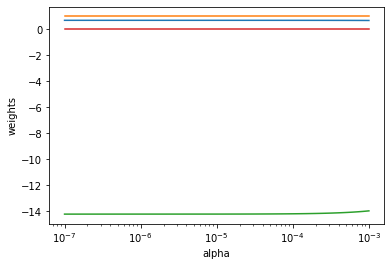

In [10]:
lasso = Lasso(max_iter=50000, normalize=True) # let's normalize the data so that all predictors are of the same scale
coefs = [] # we'll collect the lasso coefficients, the mse in the test set and the mse in the training set for each value of alpha

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)   # this implements the lasso with the above value of alpha=a for the training set
    coefs.append(lasso.coef_) # recovers the coefficients of the predictors
  

# we can plot the coefficients of predictors as a function of alpha
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')


In [11]:
lasso.set_params(alpha=alphas[0])
lasso.fit(x_train, y_train)
print(lasso.coef_)

# we see below that all predictors are active (the coefficients are non-zero)

[ 7.01079474e-01  9.99764992e-01 -1.42478989e+01  2.68209474e-04]


In [12]:

lmindextest = sm.OLS.from_formula('daily_total ~ index + sqrtd + daily_total_7 + daily_total_28', data=df_test)
resultindex_test = lmindextest.fit() # results of the OLS regression
# Let's compute the MSE of the model
residualstest=np.array(resultindex_test.resid)
msetest = np.mean(np.square(residualstest))
rmsetest= np.sqrt(msetest)
print('MSE Test Set = ' , msetest )
print('RMSE Test = ', rmsetest)
resultindex_test.summary()

MSE Test Set =  269199257.58455116
RMSE Test =  16407.29281705398


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            daily_total   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     10.73
Date:                Fri, 13 May 2022   Prob (F-statistic):           4.24e-07
Time:                        18:26:43   Log-Likelihood:                -1012.3
No. Observations:                  91   AIC:                             2035.
Df Residuals:                      86   BIC:                             2047.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.416e+06   1.39e+06      1.735      0.086   -3.52e+05    5.18e+06
index           7412.5063   4277.580      1.733      0.087   -1091.041    1.59e+04
sqrtd           -2.66e+05   1.55e+05     -1.720      0.089   -5.73e+05    4.14e+04
daily_total_7      0.4964      0.082      6.022      0.000       0.333       0.660
daily_total_28    -0.0564      0.092     -0.613      0.541      -0.239       0.126
==============================================================================
Omnibus:                        1.112   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                0.908
Skew:                           0.245   Prob(JB):                        0.635
Kurtosis:                       2.990   Cond. No.                     5.76e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'weights')

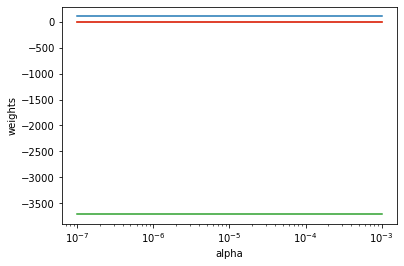

In [13]:
lasso = Lasso(max_iter=50000, normalize=True) # let's normalize the data so that all predictors are of the same scale
coefst = [] # we'll collect the lasso coefficients, the mse in the test set and the mse in the training set for each value of alpha

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_test, y_test)   # this implements the lasso with the above value of alpha=a for the training set
    coefst.append(lasso.coef_) # recovers the coefficients of the predictors
  

# we can plot the coefficients of predictors as a function of alpha
ax = plt.gca()
ax.plot(alphas, coefst)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [14]:
lasso.set_params(alpha=alphas[0])
lasso.fit(x_test, y_test)
print(lasso.coef_)

# we see below that all predictors are active (the coefficients are non-zero)

[ 1.03588222e+02  9.99359326e-01 -3.70936231e+03  8.81524263e-04]
